In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,May_15,April_2,May_7,April,May_4,May_10,May_18,May,September_3,May_9,...,April_3,August_4,May_6,May_5,December,May_11,February_4,February,September_2,May_12
0,-0.477951,0.549644,-0.138533,0.057716,0.635403,0.148821,-0.618299,-0.137051,0.196845,-0.203807,...,0.139916,-0.364241,0.075390,0.191889,0.022425,-0.100411,0.392825,0.217749,0.205868,-0.233311
1,-0.181143,0.301774,0.164138,-0.064300,0.260732,0.127453,-0.379904,-0.077767,0.196845,-0.181222,...,-0.051579,-0.364241,-0.006591,0.041775,0.022425,-0.086533,0.189443,0.185771,0.205868,-0.164396
2,-0.143727,0.202343,-0.137255,-0.012720,0.486865,-0.118703,-0.549860,-0.084758,-0.108997,-0.251399,...,0.032373,0.033084,-0.028131,0.109907,0.109422,0.006071,0.396858,0.134387,0.124342,-0.303859
3,0.021027,0.291771,0.139752,-0.023654,0.462528,-0.113571,-0.679115,-0.337028,-0.053464,-0.491434,...,0.087956,-0.288575,0.060780,-0.063403,0.316731,0.071488,0.276725,-0.163781,0.102892,0.169523
4,0.114325,0.558279,-0.016171,0.156914,0.453230,-0.327550,-0.423173,-0.324015,0.033177,-0.352388,...,-0.262395,-0.025647,0.122529,-0.093060,-0.211443,0.096375,0.407788,0.261651,0.215418,-0.158096
5,-0.314992,0.523335,0.148289,-0.056669,0.552951,-0.061617,-0.535356,-0.222660,0.115539,-0.266909,...,-0.223481,-0.019707,0.137802,-0.134376,0.158722,0.042728,0.240314,-0.028712,0.240113,0.071690
6,-0.029512,0.525110,0.014036,0.123758,0.324065,-0.308104,-0.416714,-0.416018,0.155322,-0.495252,...,-0.411243,0.003937,0.017391,-0.012434,0.285372,-0.162624,0.138795,0.044347,0.177398,-0.243282
7,-0.292144,0.569320,0.079009,-0.205982,0.846530,-0.109477,-0.669647,-0.181390,0.308161,-0.393570,...,-0.274659,-0.215552,0.308414,0.347585,0.182755,0.077783,0.064305,-0.012366,0.058563,-0.082292
8,-0.283594,0.377989,0.126428,0.363870,0.499065,-0.218787,-0.532849,0.065029,0.679527,-0.270051,...,0.099764,-0.165242,0.237935,0.293251,0.206553,0.339921,0.361292,0.346478,0.443617,-0.404638
9,-0.233859,0.602878,-0.024452,0.013008,0.133605,0.043251,-0.410779,0.034993,0.081585,-0.194222,...,-0.152039,-0.036685,0.148337,0.115377,0.074358,-0.062274,0.409826,0.274591,0.298029,-0.285229


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.96480490e+00, -1.58794912e-02, -1.23784085e-01,
         4.09955393e-01,  1.32505447e+00,  7.18566846e-01,
        -1.04453785e+00, -9.61793425e-02, -3.12484823e-01,
         7.38160395e-01],
       [-7.82648870e-01, -1.16358009e+00,  1.11477325e+00,
        -4.61701142e-01, -5.24423709e-01,  6.14007088e-01,
         5.08799958e-01,  1.93930037e-01, -3.12484823e-01,
         8.55150246e-01],
       [-6.33625774e-01, -1.62396816e+00, -1.18553889e-01,
        -9.32264379e-02,  5.91827056e-01, -5.90510858e-01,
        -5.98604023e-01,  1.59720969e-01, -1.45159628e+00,
         4.91637913e-01],
       [ 2.25736591e-02, -1.20989417e+00,  1.01498399e+00,
        -1.71340624e-01,  4.71696026e-01, -5.65399109e-01,
        -1.44080007e+00, -1.07478861e+00, -1.24476092e+00,
        -7.51726589e-01],
       [ 3.94173888e-01,  2.41002234e-02,  3.76935528e-01,
         1.11860580e+00,  4.25795633e-01, -1.61246871e+00,
         2.26863951e-01, -1.01111028e+00, -9.22066523e-01,
        -3.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 1.582035  ,  0.13405047, -1.19443032,  1.09726233, -0.7094849 ,
        -0.21850404,  0.02182078, -0.82969885,  1.78450242, -1.06915375],
       [-0.56448653, -0.90905174,  0.78739636, -1.20906517, -0.6401869 ,
         0.19346489,  2.02896413, -0.16962846, -1.12478854, -0.30159056],
       [ 0.63175548,  0.00757064,  0.05936566, -0.022708  ,  0.96314181,
        -1.05387972, -0.27091382, -0.35508521,  1.60355088, -0.5418067 ],
       [-1.18619767, -0.84656618,  0.34076718, -0.66083635,  0.61964892,
        -0.45860782, -1.21780921,  0.98729068, -0.45404766,  0.16188735],
       [-1.55000812, -0.74886424, -0.67180906,  1.10669788,  1.47991072,
        -0.08704742,  0.59929392,  0.58345482, -0.82624668,  0.8691503 ],
       [-0.30367622, -0.8862223 , -1.33095483, -1.79016816,  1.49676289,
        -0.74564263, -1.13852532,  0.73993162, -0.43258279, -1.8169529 ],
       [ 1.04993329, -0.58840493, -0.22012826,  0.57814939, -0.13978612,
        -1.02909939,  1.46856303, -1.20134477

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 46}
Best Score: 0.07043678145548016
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 21}
Best Score: 0.20255458825020584
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 9}
Best Score: 0.1129055222213809
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 3}
Best Score: 0.18383972252084452
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 44}
Best Score: -0.04691371698563557


In [13]:
y_pred_list

[array([-0.29530677,  0.0680129 , -0.18797503,  0.10257163,  0.10404558,
         0.12931897, -0.29681003, -0.48463653, -0.06265905, -0.01453342,
        -0.47305908, -0.28500028, -0.24934133,  0.10048806,  0.36359458,
         0.11970568]),
 array([-0.50630234,  0.09202533, -0.44242537,  0.21315822,  0.16405536,
         0.08406835, -0.50563744, -0.84899872,  0.05617872, -0.08343319,
        -0.56709665, -0.59544802, -0.17491793,  0.43980981,  0.62942355,
         0.49447083]),
 array([-0.54870491,  0.10906474, -0.24757407,  0.21954093,  0.21954093,
         0.10906474, -0.54870491, -0.65422078,  0.11402506,  0.10906474,
        -0.55859354, -0.45307767,  0.00354887,  0.10906474,  0.29354522,
         0.10906474]),
 array([-0.58414683,  0.44244589, -0.37773268,  0.44244589,  0.08369589,
         0.44244589, -0.58414683, -0.92456349, -0.25672078,  0.08369589,
        -0.63583333, -0.63583333, -0.25672078,  0.08369589,  1.42583333,
         0.08369589]),
 array([-0.34279424,  0.03453733

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.5575475940462052,
 0.6760699078373288,
 0.3205297679394433,
 0.5730158970905687,
 0.8618063920715349]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'SST (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'SST Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 46}
Best Score: 0.07043678145548016
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 21}
Best Score: 0.20255458825020584
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 9}
Best Score: 0.1129055222213809
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 3}
Best Score: 0.18383972252084452
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 44}
Best Score: -0.04691371698563557


In [21]:
y_pred_list_rf

[array([-0.29530677,  0.0680129 , -0.18797503,  0.10257163,  0.10404558,
         0.12931897, -0.29681003, -0.48463653, -0.06265905, -0.01453342,
        -0.47305908, -0.28500028, -0.24934133,  0.10048806,  0.36359458,
         0.11970568]),
 array([-0.50630234,  0.09202533, -0.44242537,  0.21315822,  0.16405536,
         0.08406835, -0.50563744, -0.84899872,  0.05617872, -0.08343319,
        -0.56709665, -0.59544802, -0.17491793,  0.43980981,  0.62942355,
         0.49447083]),
 array([-0.54870491,  0.10906474, -0.24757407,  0.21954093,  0.21954093,
         0.10906474, -0.54870491, -0.65422078,  0.11402506,  0.10906474,
        -0.55859354, -0.45307767,  0.00354887,  0.10906474,  0.29354522,
         0.10906474]),
 array([-0.58414683,  0.44244589, -0.37773268,  0.44244589,  0.08369589,
         0.44244589, -0.58414683, -0.92456349, -0.25672078,  0.08369589,
        -0.63583333, -0.63583333, -0.25672078,  0.08369589,  1.42583333,
         0.08369589]),
 array([-0.34279424,  0.03453733

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.5575475940462052,
 0.6760699078373288,
 0.3205297679394433,
 0.5730158970905687,
 0.8618063920715349]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'SST (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'SST Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SST/10 predictors/pearson/comparison plots/randomforest


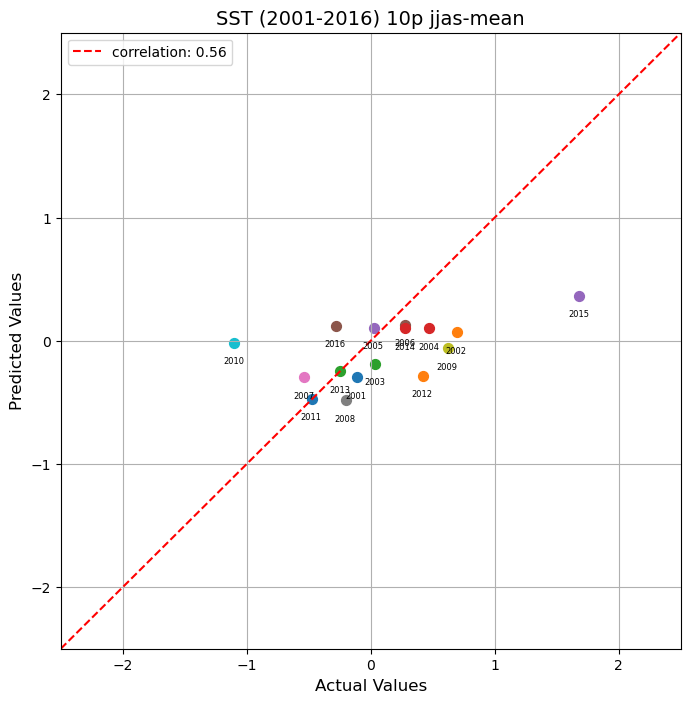

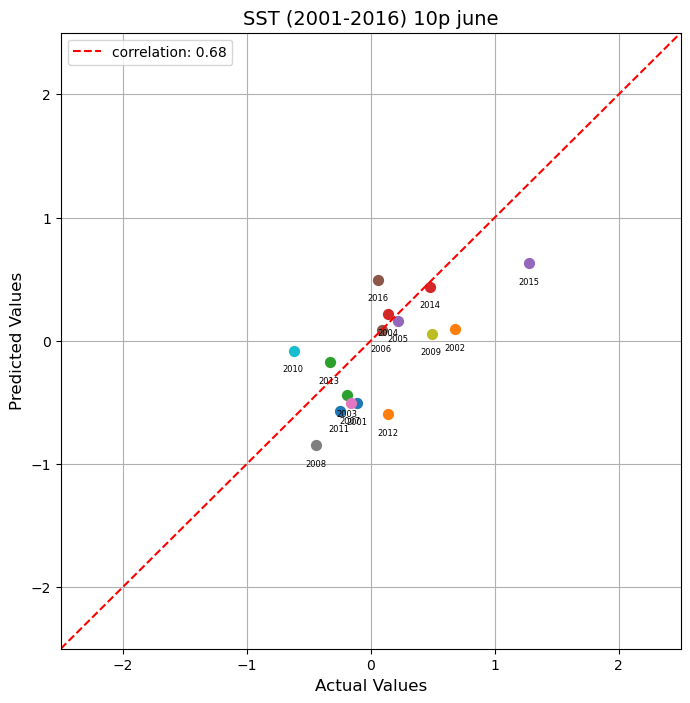

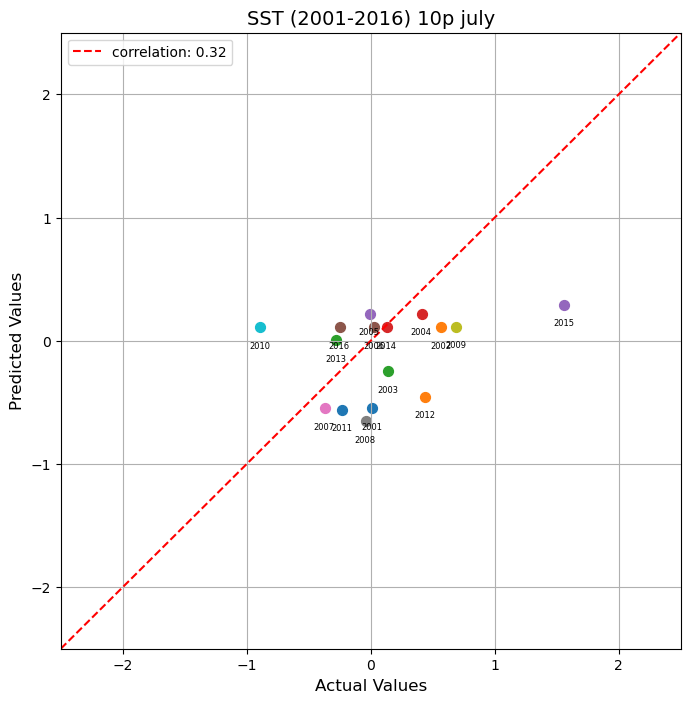

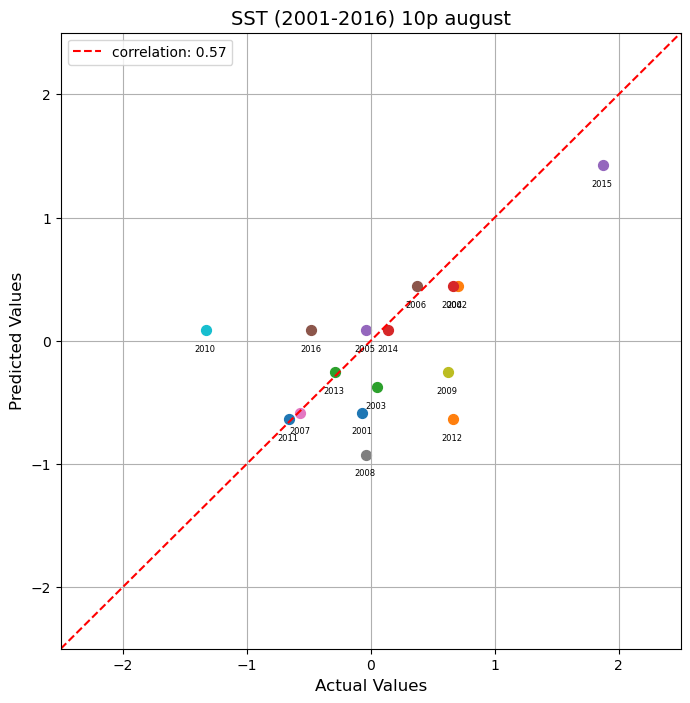

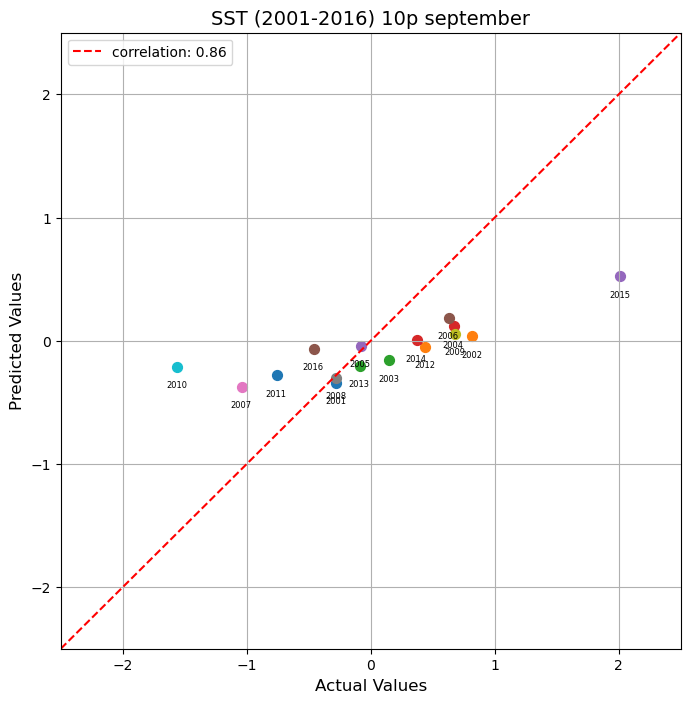

In [31]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 8))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=50)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2.5, 2.5], [-2.5, 2.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'SST (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2.5, 2.5)  # Set limits from -2 to 2
    plt.ylim(-2.5, 2.5)
    plt.grid(True)
    plt.legend()
    plt.show